In [1]:
# General utils
import time
import os
import random
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and testing utils
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    KFold
)
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Preprocessing
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    PolynomialFeatures
)

# Linear Models
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Tree-based Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# Support Vector Machine
from sklearn.svm import SVR

## kNN
from sklearn.neighbors import KNeighborsRegressor
#XGBoost
from xgboost import XGBRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Problem Description

# EDA

In [4]:
dataset = pd.read_csv("/content/drive/Shareddrives/Data Mining/M1_final.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [6]:
dataset.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [7]:
dataset.isnull().sum()

,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
TAIL_NUM,0
DEST,0
DEP_DELAY,0
CRS_ELAPSED_TIME,0
DISTANCE,0
CRS_DEP_M,0


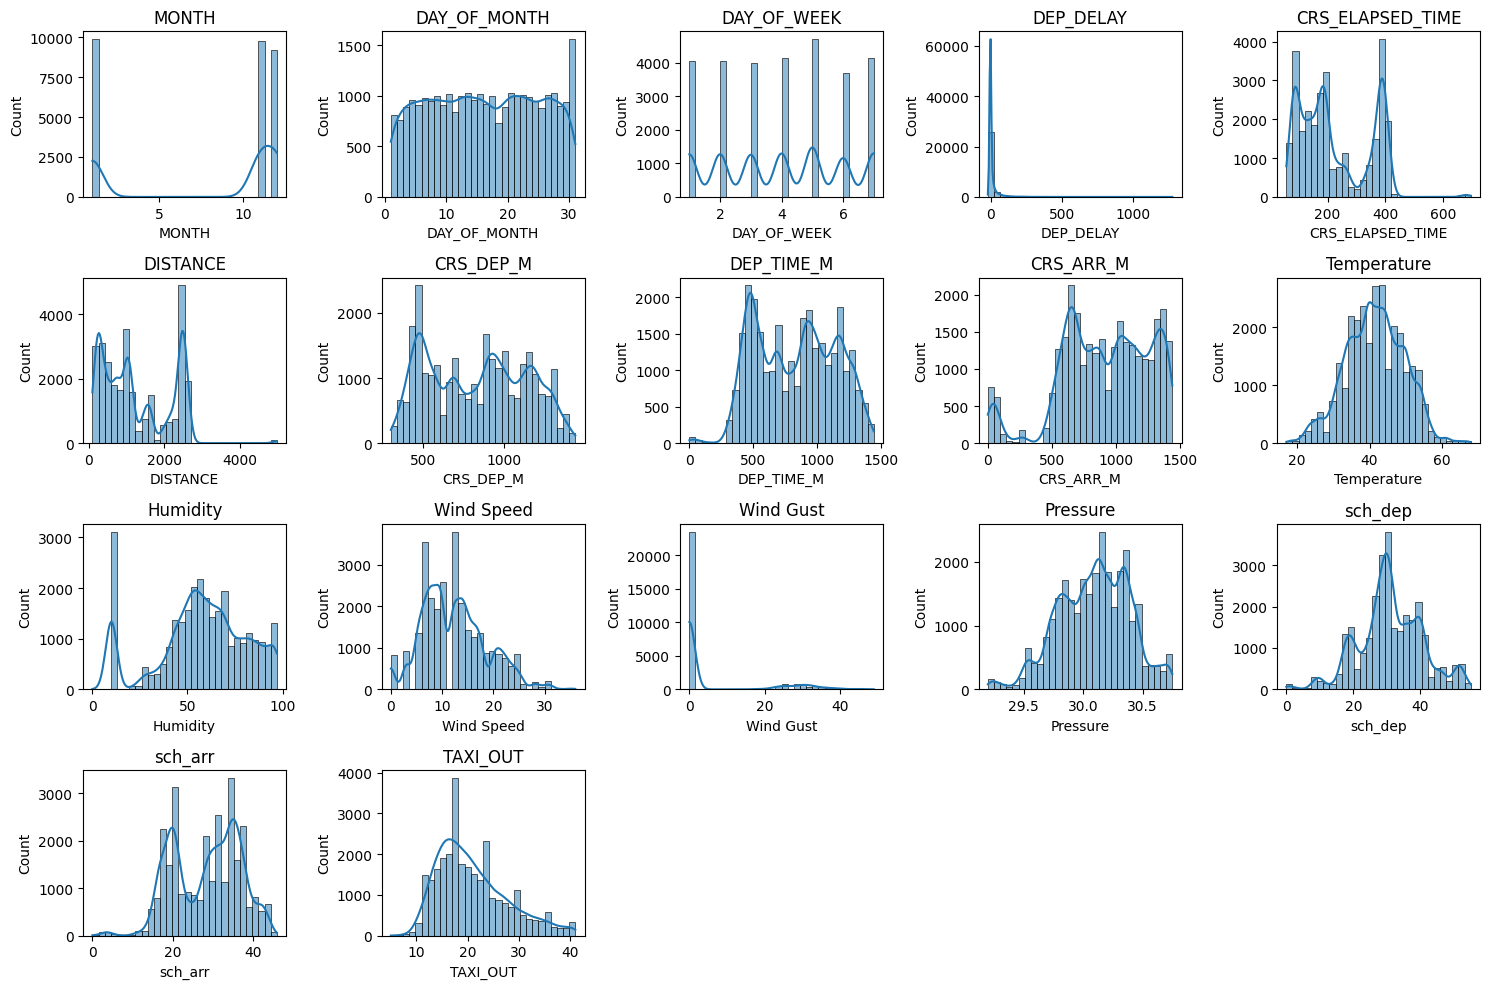

In [10]:
# Plot distribution of numerical features
num_features = dataset.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 5, i)
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

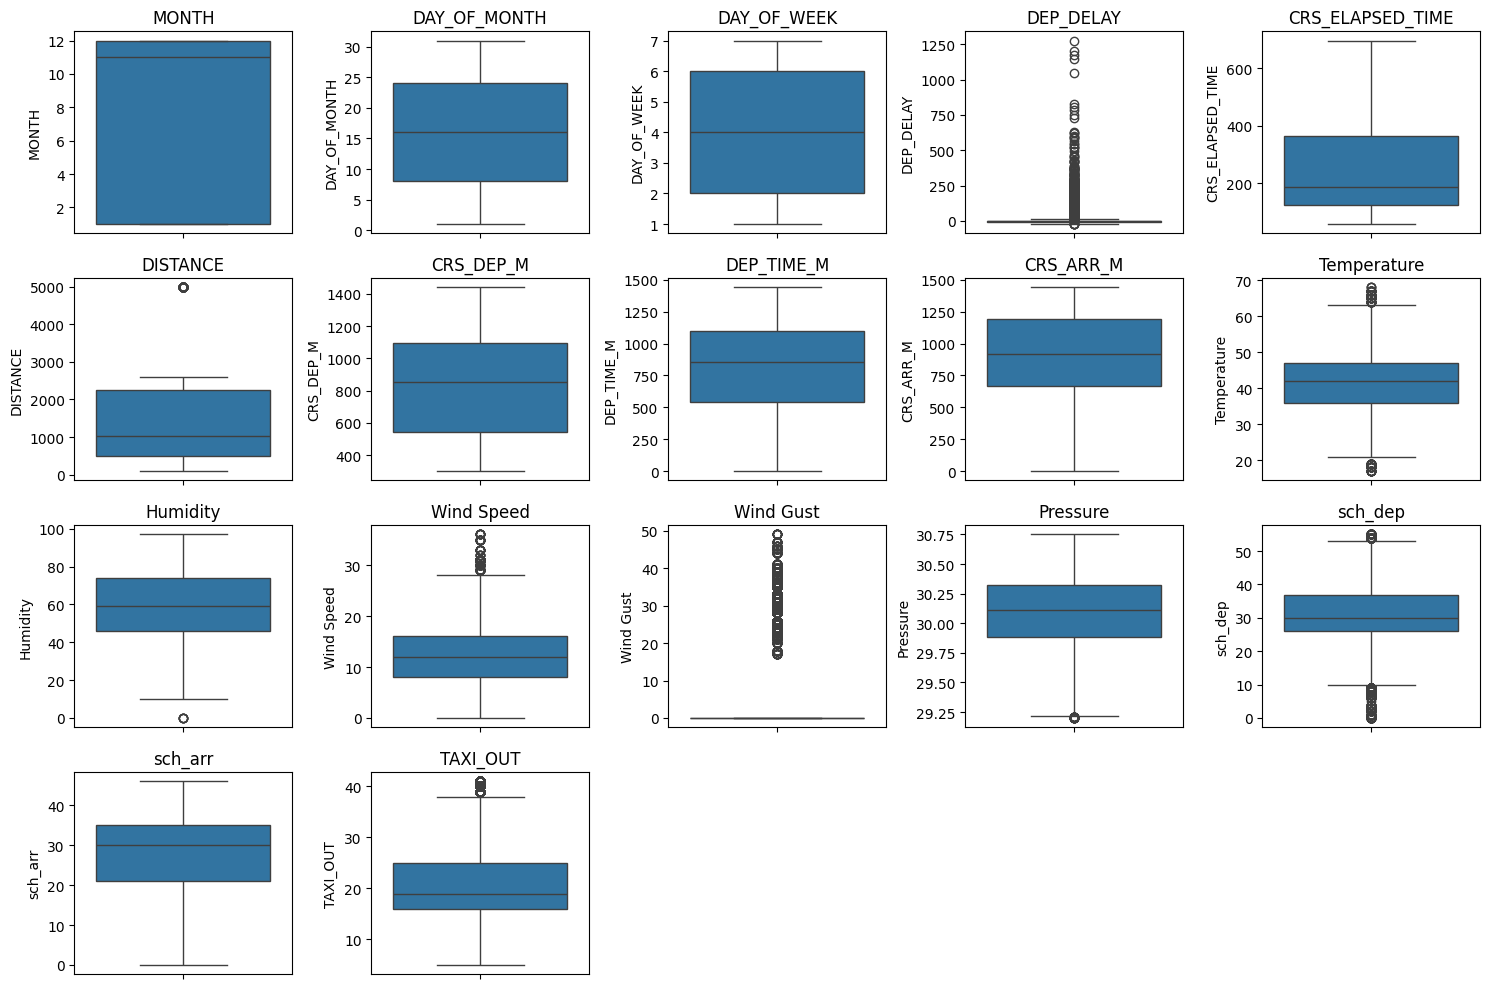

In [12]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=dataset[col])
    plt.title(col)

plt.tight_layout()
plt.show()

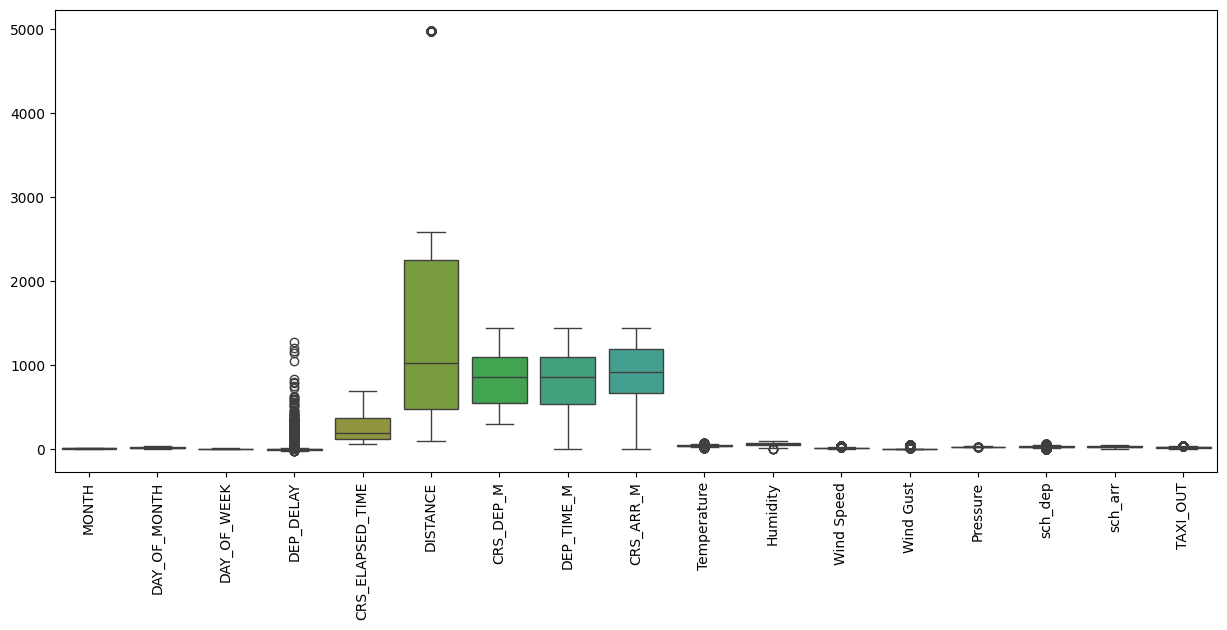

In [11]:
# Boxplot for all features
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.show()

## Target Variable Distribution

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(dataset['DEP_DELAY'], bins=100, edgecolor='black')
plt.xlabel('Departure Delay')
plt.ylabel('Count')
plt.title('Departure Delay Distribution in minutes')
plt.show()

## Feature Correlation

### Cross-feature Correlation

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of the Features")
plt.show()

### Correlation of Target Variable with Other Features

In [ ]:
plt.figure(figsize=(12,8))
dataset.corr(numeric_only=True)['DEP_DELAY'].drop('DEP_DELAY').plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel("Correlation Coefficient")
plt.title("Correlation of Other Features with 'DEP_DELAY'")
plt.axhline(0, color='black', linewidth=0.8)  # Add baseline at 0
plt.show()

# Feature Engineering

## Dropping Unnecessary and Wrong Features

In [ ]:
dataset = dataset.drop(['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'DEP_TIME_M', 'CRS_ELAPSED_TIME', 'Wind Gust'], axis=1)
dataset.info()

## Dropping Outliers

In [ ]:
dataset = dataset[dataset['DEP_DELAY'] < 60]
dataset.info()

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(dataset['DEP_DELAY'], bins=100, edgecolor='black')
plt.xlabel('Departure Delay')
plt.ylabel('Count')
plt.title('Departure Delay Distribution in minutes')
plt.show()

## Handling Corrupted Variables

In [ ]:
dataset['Dew Point'].unique()

In [ ]:
dataset['Dew Point'] = pd.to_numeric(dataset['Dew Point'], errors='coerce')
dataset.isna().sum()['Dew Point']

In [ ]:
dataset = dataset.dropna()
dataset.info()

## Handling Null Values

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset[dataset.isna().any(axis=1)]

In [ ]:
dataset[dataset.isnull().any(axis=1)]

## Encoding Categorical Values

In [ ]:
dataset['Condition'].nunique()

In [ ]:
dataset['Wind'].nunique()

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Condition', 'Wind'])
dataset.info()

# Models Training

## Dataset Preparation and Splitting

In [ ]:
X = dataset.drop(columns=["DEP_DELAY"])
y = dataset["DEP_DELAY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models Definition

In [ ]:
linear_models = {
    # "LinearRegression w/o Scaling": (make_pipeline(LinearRegression()), {}),
    "LinearRegression w/ Scaling": (make_pipeline(StandardScaler(), LinearRegression()), {}),
    "LinearRegression w/ Scaling & Poly": (make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression()), {}),
    # "Ridge w/o Scaling": (make_pipeline(Ridge()), {"ridge__alpha": [0.01, 0.1, 1, 10, 100, 1000]}),
    # "Lasso w/o Scaling": (make_pipeline(Lasso()), {"lasso__alpha": [0.01, 0.1, 1, 10, 100, 1000]}),
    "Ridge w/ Scaling & Poly": (make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge()), {"ridge__alpha": [0.01, 0.1, 1, 10, 100, 1000]}),
    "Lasso w/ Scaling & Poly": (make_pipeline(StandardScaler(), PolynomialFeatures(), Lasso()), {"lasso__alpha": [0.01, 0.1, 1, 10, 100, 1000]}),
}

tree_ensemble_models = {
    "DecisionTree": (DecisionTreeRegressor(), {"max_depth": [3, 5, 10, 15]}),
    "RandomForest": (RandomForestRegressor(), {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10, 15]}),
    "BaggingRegressor": (
        BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50),
        {"n_estimators": [50, 100, 200], "estimator__max_depth": [3, 5, 10, 15]}
    ),
    "GradientBoosting": (GradientBoostingRegressor(), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}),
    "AdaBoost": (AdaBoostRegressor(), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}),
    "XGBoost": (XGBRegressor(random_state=42, objective="reg:squarederror"), {"n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "subsample": [0.7, 0.9, 1.0]})
}

other_models = {
    # "Linear SVR w/o Scaling": (make_pipeline(StandardScaler(), SVR(kernel="linear")), {"svr__C": [0.1, 1, 10, 100, 1000],}),
    "Linear SVR w/ Scaling": (make_pipeline(StandardScaler(), SVR(kernel="linear")), {"svr__C": [0.1, 1, 10, 100, 1000],}),
    # "RBF SVR w/o Scaling": (make_pipeline(StandardScaler(), SVR(kernel="rbf")), {"svr__C": [0.1, 1, 10, 100, 1000],}),
    "RBF SVR w/ Scaling": (make_pipeline(StandardScaler(), SVR(kernel="rbf")), {"svr__C": [0.1, 1, 10, 100, 1000],}),
    # "KNN w/o Scaling": (make_pipeline(StandardScaler(), KNeighborsRegressor()), {"kneighborsregressor__n_neighbors": [3, 5, 7, 9]}),
    "KNN w/ Scaling": (make_pipeline(StandardScaler(), KNeighborsRegressor()), {"kneighborsregressor__n_neighbors": [3, 5, 7, 9]}),
}

In [ ]:
dataset.describe()

## Cross-Validation-based Hyperparameter Tuning and Evaluation on Test Set

In [ ]:
def model_tuning(models_with_hyperparams):
    best_models = {}

    for name, (model, param_grid) in models_with_hyperparams.items():
        if param_grid:
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            best_model = model.fit(X_train, y_train)
            best_params = {}

        best_models[name] = {
            "model": best_model,
            "params": best_params,
        }

        print(f"Best hyperparams for '{name}': {best_params}\n")

    return best_models

In [ ]:
def test_model(model, model_name, X_test, y_test):
    y_pred = model['model'].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Metrics for '{model_name}' with params {model['params']}")
    print(f"MSE: {mse:<10.3} RMSE: {rmse:<10.3} MAE: {mae:<10.3} R2: {r2:<10.3} \n")
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

### Linear Models

In [ ]:
best_linear_models = model_tuning(linear_models)

In [ ]:
linear_model_metrics = {}
for name, model in best_linear_models.items():
    metrics = test_model(model, name, X_test, y_test)
    linear_model_metrics[name] = metrics

### Tree-based and Ensemble Models

In [ ]:
best_tree_ensemble_models = model_tuning(tree_ensemble_models)

In [ ]:
tree_ensemble_model_metrics = {}
for name, model in best_tree_ensemble_models.items():
    metrics = test_model(model, name, X_test, y_test)
    tree_ensemble_model_metrics[name] = metrics

### SVM and k-NN

In [ ]:
best_other_models = model_tuning(other_models)

In [ ]:
other_model_metrics = {}
for name, model in best_other_models.items():
    metrics = test_model(model, name, X_test, y_test)
    other_model_metrics[name] = metrics

# Comparative Analysis

## Visual comparison of the models

In [ ]:
def visual_comparison(model_metrics, title):
    comp_data = []
    for name, metrics in model_metrics.items():
        comp_data.append([name, metrics['mae'], metrics['rmse'], metrics['r2']])
    metrics_df = pd.DataFrame(comp_data, columns=["Model", "MAE", "RMSE", "R2 Score"])
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(title)
    for i, metric in enumerate(["MAE", "RMSE", "R2 Score"]):
        sns.barplot(x="Model", y=metric, data=metrics_df, ax=axes[i], palette="viridis")
        axes[i].set_title(f"{metric} Comparison")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [ ]:
visual_comparison(linear_model_metrics, "Linear Models Comparison")

In [ ]:
visual_comparison(tree_ensemble_model_metrics, "Tree and Ensemble Models Comparison")

In [ ]:
visual_comparison(other_model_metrics, "SVM and k-NN Models Comparison")

In [ ]:
visual_comparison({**linear_model_metrics, **tree_ensemble_model_metrics, **other_model_metrics}, "All Models Comparison")